<a href="https://colab.research.google.com/github/O-Kpy/Kaggle/blob/main/2017_kaggle_survey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline
%config inLineBackend.figure_format = 'retina' 
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

In [1]:
!pip install plotly.express

#  Kaggle ver 2017


--------------------------------------------------------------------------------
Kaggle에서 실시한 Survey로 만든 데이터셋이다.


모델링과 성능평가는 할수 없지만, 클리닝(Cleaning)과 시각화(visualization)을 시도한다.



1.   데이터 탑재
2.   데이터 형태 확인
3.   데이터 결측치와 이상값(Outlier)를 확인하고 처리
4.   데이터 시각화(visualization)

**데이터의 columns 들이 question이다. rows들이 개개인 답변**


In [3]:
data = pd.read_csv('/content/drive/MyDrive/dataset/kaggle/kaggle survey/2017/multipleChoiceResponses.csv', encoding='ISO-8859-1')

In [6]:
data.shape

(16716, 228)

In [7]:
data.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,CurrentEmployerType,MLToolNextYearSelect,MLMethodNextYearSelect,LanguageRecommendationSelect,PublicDatasetsSelect,LearningPlatformSelect,LearningPlatformUsefulnessArxiv,LearningPlatformUsefulnessBlogs,LearningPlatformUsefulnessCollege,LearningPlatformUsefulnessCompany,LearningPlatformUsefulnessConferences,LearningPlatformUsefulnessFriends,LearningPlatformUsefulnessKaggle,LearningPlatformUsefulnessNewsletters,LearningPlatformUsefulnessCommunities,LearningPlatformUsefulnessDocumentation,LearningPlatformUsefulnessCourses,LearningPlatformUsefulnessProjects,LearningPlatformUsefulnessPodcasts,LearningPlatformUsefulnessSO,LearningPlatformUsefulnessTextbook,LearningPlatformUsefulnessTradeBook,LearningPlatformUsefulnessTutoring,LearningPlatformUsefulnessYouTube,BlogsPodcastsNewslettersSelect,LearningDataScienceTime,JobSkillImportanceBigData,JobSkillImportanceDegree,JobSkillImportanceStats,JobSkillImportanceEnterpriseTools,...,WorkChallengeFrequencyITCoordination,WorkChallengeFrequencyHiringFunds,WorkChallengeFrequencyPrivacy,WorkChallengeFrequencyScaling,WorkChallengeFrequencyEnvironments,WorkChallengeFrequencyClarity,WorkChallengeFrequencyDataAccess,WorkChallengeFrequencyOtherSelect,WorkDataVisualizations,WorkInternalVsExternalTools,WorkMLTeamSeatSelect,WorkDatasets,WorkDatasetsChallenge,WorkDataStorage,WorkDataSharing,WorkDataSourcing,WorkCodeSharing,RemoteWork,CompensationAmount,CompensationCurrency,SalaryChange,JobSatisfaction,JobSearchResource,JobHuntTime,JobFactorLearning,JobFactorSalary,JobFactorOffice,JobFactorLanguages,JobFactorCommute,JobFactorManagement,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,Employed by a company that doesn't perform adv...,SAS Base,Random Forests,F#,Dataset aggregator/platform (i.e. Socrata/Kagg...,"College/University,Conferences,Podcasts,Trade ...",NaN,NaN,NaN,NaN,Very useful,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Very useful,NaN,NaN,Somewhat useful,NaN,NaN,"Becoming a Data Scientist Podcast,Data Machina...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Often,Most of the time,NaN,NaN,NaN,NaN,26-50% of projects,Do not know,Standalone Team,NaN,NaN,Document-oriented (e.g. MongoDB/Elasticsearch)...,"Company Developed Platform,I don't typically s...",NaN,"Mercurial,Subversion,Other",Always,NaN,NaN,I am not currently employed,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,Random Forests,Python,Dataset aggregator/platform (i.e. Socrata/Kagg...,Kaggle,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat useful,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Becoming a Data Scientist Podcast,Siraj Raval ...",1-2 years,NaN,Nice to have,Unnecessary,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Amazon Web services,Deep learning,R,Dataset aggregator/platform (i.e. Socrata/Kagg...,"Arxiv,College/University,Kaggle,Online courses...",Very useful,NaN,Somewhat useful,NaN,NaN,NaN,Somewhat useful,NaN,NaN,NaN,Very useful,NaN,NaN,NaN,NaN,NaN,NaN,Very useful,"FastML Blog,No Free Hunch Blog,Talking Machine...",1-2 years,Necessary,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Asking friends, family members, or former coll...",1-2,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Impor

데이터의 칼럼(columns) 수는 228개,

데이터의 행(rows)==(참여수)은 16716개

columns(Question)을 살펴보면 본인의 정보를 나타내는 col은 data[:,:3]이다.

**개인정보를 이용해 분포가 어떻게 되는지 시각화까지 해보겠다.**

In [15]:
data_copy = data.copy()

In [17]:
data_copy['GenderSelect'] = data_copy['GenderSelect'].apply(lambda x: 'ETC' if x not in ['Male', 'Female'] else x)
## male,female외에 'ETC'로 바꾸다

In [19]:
data_gender = data_copy['GenderSelect'].value_counts()

Text(0.5, 1.0, 'Distribution of Gender')

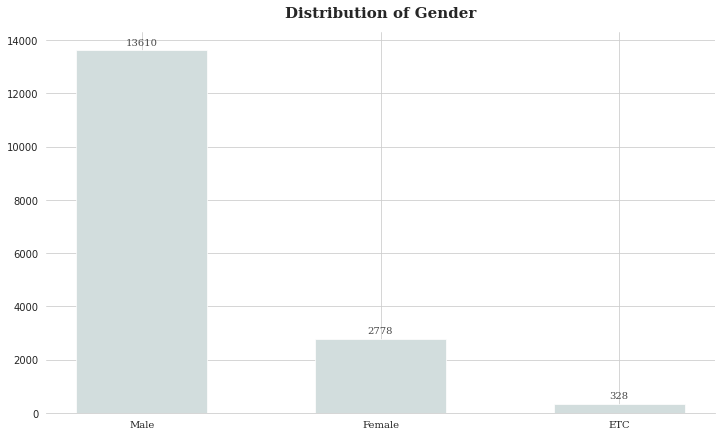

In [37]:
fig, ax = plt.subplots(figsize=(12,7))
ax.bar(data_gender.index, data_gender, color='#d2dddd', width=.55, linewidth=.7)

for i in data_gender.index:
  ax.annotate(data_gender[i], xy=(i, data_gender[i] + 300), va='center', ha='center', color='#4a4a4a', fontfamily='serif')

for s in ['top', 'left', 'right']:
  ax.spines[s].set_visible(False)

ax.set_xticklabels(data_gender.index, fontsize=10, fontfamily='serif')
ax.set_title('Distribution of Gender', fontsize=15, pad=15, fontweight='bold', fontfamily='serif')

Text(0.5, 1.0, 'Country distibution of gender')

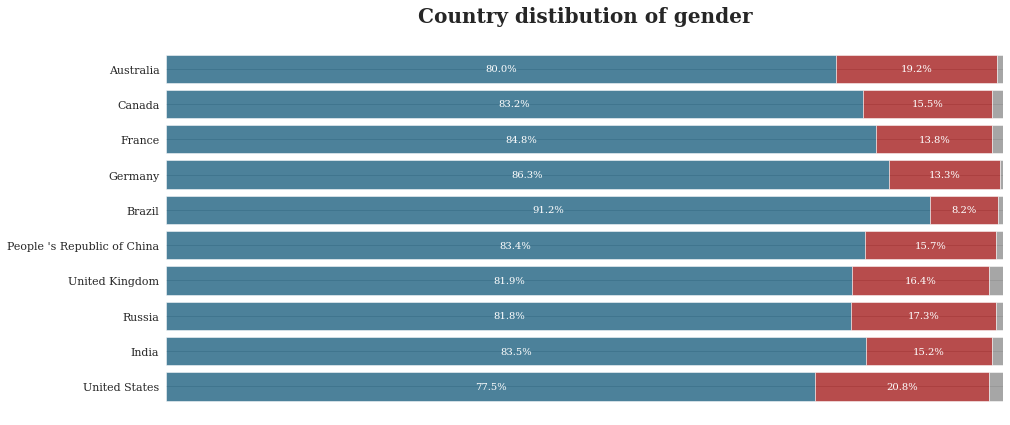

In [115]:
countrytop10 = data_copy['Country'].value_counts()[:11].drop(['Other'], axis=0).index
data_c_g = data_copy.groupby('Country')['GenderSelect'].value_counts(normalize=True).unstack().loc[countrytop10]
## 나라와 성별을 그룹바이 한 변수 <== data_c_g

fig, ax = plt.subplots(figsize=(15,7))
ax.barh(data_c_g.index, data_c_g['Male'], color='#004c70', linewidth=.7, alpha=.7)
ax.barh(data_c_g.index, data_c_g['Female'], color='#990000', linewidth=.7, left=data_c_g['Male'], alpha=.7)
ax.barh(data_c_g.index, data_c_g['ETC'], color='gray', linewidth=.7, left=data_c_g['Male'] + data_c_g['Female'], alpha=.7)

ax.set_xlim(0,1)
ax.set_xticks([])

for i in data_c_g['Male'].index:
  ax.annotate(f"{round(data_c_g['Male'][i]*100, 1)}%", xy=(data_c_g['Male'][i]/2, i), ha='center', va='center', color='w', fontweight='light', fontfamily='serif')
for i in data_c_g['Female'].index:
  ax.annotate(f"{round(data_c_g['Female'][i]*100, 1)}%", xy=(data_c_g['Male'][i] + data_c_g['Female'][i]/2, i), ha='center', va='center', color='w', fontweight='light', fontfamily='serif')

for s in ['top', 'left', 'right', 'bottom']:
  ax.spines[s].set_visible(False)

ax.set_yticklabels(data_c_g.index, fontfamily='serif', fontsize=11)
ax.set_title('Country distibution of gender', fontsize=20, pad=15, fontweight='bold', fontfamily='serif')

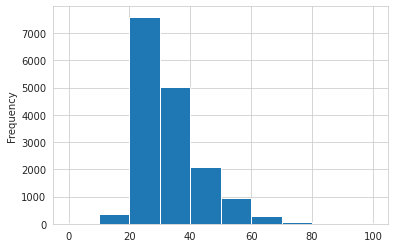

In [118]:
data_copy.Age.plot.hist()
## 대부분 20~60세이다
## 나이 카테고리를 만들건데 10-20,20-30,...식으로 만들겠다.

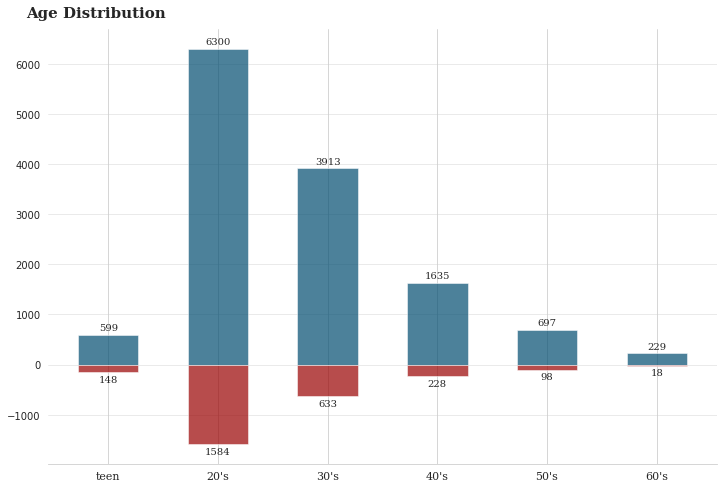

In [199]:
agelabel = ['teen', "20's", "30's", "40's", "50's", "60's"] ## 카테고리를 string으로 바꿀수있다.
data_copy['Age_cut'] = pd.cut(data_copy.Age, bins=np.linspace(10,70, num=7), labels=agelabel)
## pd.cut을 사용해 나이 카테고리를 생성
data_ag = data_copy.groupby('Age_cut')['GenderSelect'].value_counts().unstack()
male = data_ag['Male']
female = -data_ag['Female']
## barplot으로 만들기위한 변수들

fig, ax = plt.subplots(figsize=(12,8))
ax.bar(male.index, male, width=.55, linewidth=.7, color='#004c70', alpha=.7)
ax.bar(female.index, female, width=.55, linewidth=.7, color='#990000', alpha=.7)

for i in male.index:
  ax.annotate(male[i], xy=(i, male[i] + 130), va='center', ha='center', fontfamily='serif')
for i in female.index:
  ax.annotate(-female[i], xy=(i, female[i] - 150), va='center', ha='center', fontfamily='serif')

for s in ['top', 'left', 'right']:
  ax.spines[s].set_visible(False)

ax.set_xticklabels(male.index, fontfamily='serif', fontsize=11)
fig.text(0.1, 0.9, 'Age Distribution', fontsize=15, fontweight='bold', fontfamily='serif')
ax.grid(axis='y', linestyle='-', alpha=0.5) ## 그리드 크기 바꾸기